In [ ]:
import sqlite3
con = sqlite3.connect("DS.db")
cur = con.cursor()

In [ ]:
#Load data to DS.db from csv file

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/DataSpark/DM_fact_sales_merged_data.csv")
df.to_sql("fact_sales_merged", con, if_exists='replace', index=False)


62884

In [ ]:
#view the table
cur.execute("SELECT * FROM fact_sales_merged")
rows = cur.fetchall()
for row in rows:
    print(row)

Streaming output truncated to the last 5000 lines.
(1980002, 2, '2020-06-02', '2020-06-06', 1969722, 0, 435, 2, 'USD', 'Female', 'Isabelle Guernon', 'Pittsburgh', 'Pennsylvania', 'United States', 'North America', 'February', 1955, 'Adventure Works Desktop PC1.60 ED160 White', 'Adventure Works', 'White', 137.63, 269.95, 303, 'Desktops', 3, 'Computers', 1582.3427070378923, '01-01-2010', 1.0)
(1980002, 3, '2020-06-02', '2020-06-06', 1969722, 0, 1552, 3, 'USD', 'Female', 'Isabelle Guernon', 'Pittsburgh', 'Pennsylvania', 'United States', 'North America', 'February', 1955, 'The Phone Company PDA Palm 4.7 inch L850 Silver', 'The Phone Company', 'Silver', 131.87, 398.0, 504, 'Smart phones & PDAs', 5, 'Cell phones', 1582.3427070378923, '01-01-2010', 1.0)
(1980002, 4, '2020-06-02', '2020-06-06', 1969722, 0, 1463, 7, 'USD', 'Female', 'Isabelle Guernon', 'Pittsburgh', 'Pennsylvania', 'United States', 'North America', 'February', 1955, 'Contoso Touch Screen Phones SAW/On-wall M806 Black', 'Contoso'

In [ ]:
#fetch it in a table format
df = pd.read_sql_query("SELECT * FROM fact_sales_merged", con)
df.head()

,OrderNo,Line Item,Odate,DDate,CustKey,StoreKey,ProdKey,Quant,CurCode,Gender,...,Color,UnitCostUSD,UnitPriceUSD,SubCatKey,Subcategory,CatKey,Category,SqMeters,OpenDate,ExchangeRate
0,366000,1,2016-01-01,2016-01-05,265598,10,1304,1,CAD,Male,...,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,1210.000000,01-01-2010,1.3884
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Male,...,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,1582.342707,01-01-2010,1.0000
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Male,...,Black,220.64,665.94,803,Microwaves,8,Home Appliances,1582.342707,01-01-2010,1.0000
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Female,...,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,1582.342707,01-01-2010,1.3884
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Female,...,White,166.20,326.00,301,Laptops,3,Computers,1582.342707,01-01-2010,1.3884


In [ ]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 35.2 MB/s eta 0:00:00


In [ ]:
!pip install matplotlib

In [ ]:
import mysql.connector

from tabulate import tabulate

# Connect to the MySQL database
connection = mysql.connector.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="2XYVe2q7YJj2Bap.root",
    password="80xE8BbcMzFYrLl7",
    database="test",
)

# Create a cursor object
mycursor = connection.cursor(buffered=True)

In [ ]:
#check for null values in the column BirthYear
mycursor.execute("SELECT COUNT(*) FROM test.DS WHERE BirthYear IS NULL;")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["CustomerCount"]))

  CustomerCount
---------------
              0


In [ ]:
#select all the records whose Country is Online
mycursor.execute("SELECT * FROM test.DS WHERE Country = 'Online';")
rows = mycursor.fetchall()
print(tabulate(rows, headers=[desc[0] for desc in mycursor.description]))

orderno    lineitem    odate    ddate    custkey    storekey    prodkey    quant    curcode    gender    custname    city    state    country    continent    birthmonth    birthyear    Age    prodname    brand    color    unitcostusd    unitpriceusd    subcatkey    subcategory    catkey    category    sqmeters    opendate    exchangerate    Generation
---------  ----------  -------  -------  ---------  ----------  ---------  -------  ---------  --------  ----------  ------  -------  ---------  -----------  ------------  -----------  -----  ----------  -------  -------  -------------  --------------  -----------  -------------  --------  ----------  ----------  ----------  --------------  ------------


In [ ]:
#Update the sqfeet value whose corresponding store key value is 0
mycursor.execute("UPDATE test.DS SET SqMeters = 000 WHERE StoreKey = 0;")

#1.Customer Analysis

Gender      CustomerCount
--------  ---------------
Female              31080
Male                31804


<ipython-input-10-1f54c3c5a496>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="CustomerCount", data=gender_df, palette='pastel')


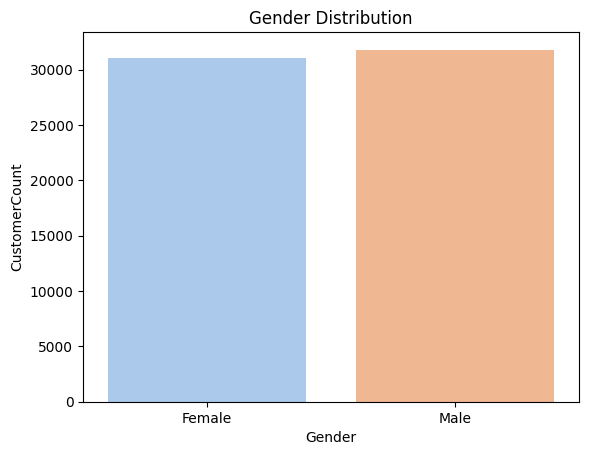

In [ ]:
#1.1.1Gender Distribution
mycursor.execute("SELECT Gender, COUNT(*) AS CustomerCount FROM test.DS GROUP BY Gender;")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["Gender", "CustomerCount"]))

#store the values as a dataframe
import pandas as pd
gender_df = pd.DataFrame(rows, columns=["Gender", "CustomerCount"])

#plot the bar chart
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="Gender", y="CustomerCount", data=gender_df, palette='pastel')
plt.title('Gender Distribution')
plt.show()

In [ ]:
#1.1.2 Age Distribution
#create a column called Age in the table DS and insert the values fetched above
# mycursor.execute("ALTER TABLE test.DS ADD COLUMN Age INT;")
mycursor.execute("UPDATE test.DS SET Age = 2024-BirthYear;")
connection.commit()

In [ ]:
# prompt: create a column called age before column generation  to the table DS and update it with  calculated values of age from birthyear

# Execute the SQL query to add the 'Age' column before 'Generation'
mycursor.execute("ALTER TABLE test.DS ADD COLUMN Age INT AFTER BirthYear;")

# Calculate and update the 'Age' column based on 'BirthYear'
mycursor.execute("UPDATE test.DS SET Age = 2024 - BirthYear;")

# Verify the changes
mycursor.execute("SELECT * FROM test.DS LIMIT 5;")  # Adjust LIMIT as needed
rows = mycursor.fetchall()
print(tabulate(rows, headers=[desc[0] for desc in mycursor.description]))


  orderno    lineitem  odate       ddate         custkey    storekey    prodkey    quant  curcode    gender    custname        city      state       country        continent      birthmonth      birthyear    Age  prodname                                brand            color      unitcostusd    unitpriceusd    subcatkey  subcategory                         catkey  category                  sqmeters  opendate      exchangerate  Generation
---------  ----------  ----------  ----------  ---------  ----------  ---------  -------  ---------  --------  --------------  --------  ----------  -------------  -------------  ------------  -----------  -----  --------------------------------------  ---------------  -------  -------------  --------------  -----------  --------------------------------  --------  ----------------------  ----------  ----------  --------------  ------------------------
   366000           1  2016-01-01  2016-01-05     265598          10       1304        1  CAD        M

In [ ]:

# Add the 'Generation' column
mycursor.execute("ALTER TABLE test.DS ADD COLUMN Generation VARCHAR(50);")

# Classify customers into generations
mycursor.execute("""
UPDATE test.DS
SET Generation = CASE
    WHEN BirthYear BETWEEN 1997 AND 2012 THEN 'Gen Z (1997-2012)'
    WHEN BirthYear BETWEEN 1981 AND 1996 THEN 'Millennials (1981-1996)'
    WHEN BirthYear BETWEEN 1965 AND 1980 THEN 'Gen X (1965-1980)'
    WHEN BirthYear BETWEEN 1946 AND 1964 THEN 'Baby Boomers (1946-1964)'
    WHEN BirthYear BETWEEN 1928 AND 1945 THEN 'Silent Generation (1928-1945)'
    ELSE 'Greatest Generation (before 1928)'
END;
""")
connection.commit()  # Commit the changes

# Verify the update
mycursor.execute("SELECT CustKey, Age, Generation FROM test.DS LIMIT 5;")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["CustKey", "Age", "Generation"]))


  CustKey  Age    Generation
---------  -----  ------------------------
   265598         Gen X (1965-1980)
  1269051         Millennials (1981-1996)
  1269051         Millennials (1981-1996)
   266019         Baby Boomers (1946-1964)
   266019         Baby Boomers (1946-1964)


Generation                       CustomerCount
-----------------------------  ---------------
Baby Boomers (1946-1964)                 17713
Gen Z (1997-2012)                         5190
Silent Generation (1928-1945)             9977
Gen X (1965-1980)                        14989
Millennials (1981-1996)                  15015


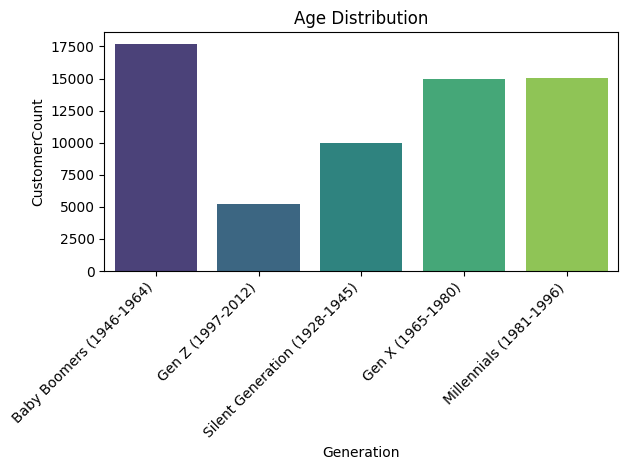

In [ ]:
mycursor.execute("SELECT Generation, COUNT(*) AS CustomerCount FROM test.DS GROUP BY Generation;")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["Generation", "CustomerCount"]))

#store the values as a dataframe
import pandas as pd
generation_df = pd.DataFrame(rows, columns=["Generation", "CustomerCount"])

#plot the bar chart
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="Generation", y="CustomerCount", data=generation_df, hue="Generation", palette='viridis', legend=False)
plt.title('Age Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Country           CustomerCount
--------------  ---------------
United States             33767
United Kingdom             8140
Germany                    5956
Canada                     5415
Australia                  2941


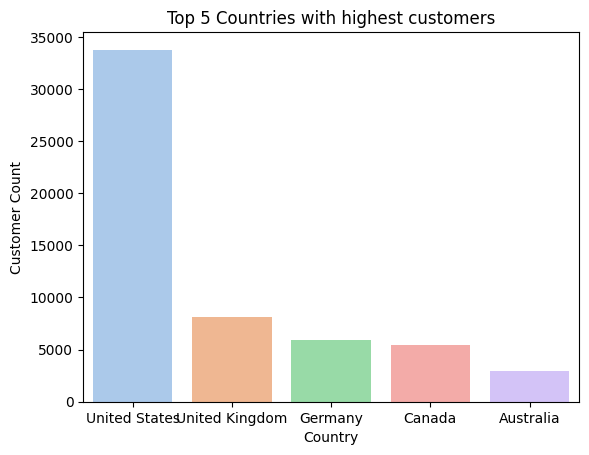

In [ ]:
#1.1.3 Top 5 Countries with highest customers
mycursor.execute("SELECT Country, COUNT(*) AS CustomerCount FROM test.DS GROUP BY Country ORDER BY CustomerCount DESC LIMIT 5;")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["Country", "CustomerCount"]))

#plot a bar chart
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="Country", y="CustomerCount", data=pd.DataFrame(rows, columns=["Country", "CustomerCount"]), hue="Country", palette='pastel')
plt.xlabel('Country')
plt.ylabel('Customer Count')
plt.title('Top 5 Countries with highest customers')
plt.show()

In [ ]:
#1.1.4 Customer Distribution by Continent
mycursor.execute("SELECT Continent, COUNT(*) AS CustomerCount FROM test.DS GROUP BY Continent ORDER BY CustomerCount DESC;")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["Continent", "CustomerCount"]))

#store the values as dataframe
import pandas as pd
continent_df = pd.DataFrame(rows, columns=["Continent", "CustomerCount"])

#plot the bar chart
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="Continent", y="CustomerCount", data=continent_df, palette='pastel')
plt.title('Customer Distribution by Continent')
plt.show()

Continent        CustomerCount
-------------  ---------------
North America            39182
Europe                   20761
Australia                 2941


In [ ]:
#store the data from the table DS in test database as a csv
mycursor.execute("SELECT * FROM test.DS")
rows = mycursor.fetchall()
import pandas as pd
df = pd.DataFrame(rows, columns=[desc[0] for desc in mycursor.description])
df.to_csv("/content/drive/MyDrive/DataSpark/DS.csv", index=False)


1.2  Purchase Patterns:

In [ ]:
#number of unique custkeys
mycursor.execute("SELECT COUNT(DISTINCT CustKey) FROM test.DS;")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["UniqueCustomerCount"]))

  UniqueCustomerCount
---------------------
                11887


#2.Purchase Analysis

In [ ]:

# Create the Customer_Purchase_Details table
mycursor.execute("""
CREATE TABLE Customer_Purchase_Details (
    CustKey INT PRIMARY KEY,
    CustName VARCHAR(255),
    AvgOrderValue DECIMAL(10, 2),
    City VARCHAR(255),
    State VARCHAR(255),
    Country VARCHAR(255),
    Continent VARCHAR(255),
    OrderFreq INT,
    ProductsPurchased INT
);
""")

# Insert unique customers and calculate purchase details
mycursor.execute("""
INSERT INTO Customer_Purchase_Details (CustKey, CustName, City, State, Country, Continent)
SELECT DISTINCT CustKey, CustName, City, State, Country, Continent
FROM test.DS;
""")

# # Calculate AvgOrderValue
# mycursor.execute("""
# UPDATE Customer_Purchase_Details
# SET AvgOrderValue = (
#     SELECT CustKey, AVG(Quant * UnitPriceUSD) AS AverageOrderValue FROM test.DS GROUP BY CustKey
#     WHERE test.DS.CustKey = Customer_Purchase_Details.CustKey
# );
# """)

# # Calculate OrderFreq
# mycursor.execute("""
# UPDATE Customer_Purchase_Details
# SET OrderFreq = (
#     SELECT COUNT(*)
#     FROM test.DS
#     WHERE test.DS.CustKey = Customer_Purchase_Details.CustKey
# );
# """)

# # Calculate ProductsPurchased
# mycursor.execute("""
# UPDATE Customer_Purchase_Details
# SET ProductsPurchased = (
#     SELECT COUNT(DISTINCT ProductKey)
#     FROM test.DS
#     WHERE test.DS.CustKey = Customer_Purchase_Details.CustKey
# );
# """)

connection.commit()

# Verify the data in the new table
mycursor.execute("SELECT * FROM Customer_Purchase_Details LIMIT 5;")
rows = mycursor.fetchall()
print(tabulate(rows, headers=[desc[0] for desc in mycursor.description]))


  CustKey  CustName         AvgOrderValue    City            State               Country    Continent    OrderFreq    ProductsPurchased
---------  ---------------  ---------------  --------------  ------------------  ---------  -----------  -----------  -------------------
      301  Lilly Harding                     Wandearah East  South Australia     Australia  Australia
      325  Madison Hull                      Mount Budd      Western Australia   Australia  Australia
      554  Claire Ferres                     Winjallok       Victoria            Australia  Australia
     1042  Aidan Pankhurst                   Tawonga South   Victoria            Australia  Australia
     1314  Isaac Israel                      Edith River     Northern Territory  Australia  Australia


In [ ]:
# Calculate AvgOrderValue
mycursor.execute("""
UPDATE Customer_Purchase_Details
SET AvgOrderValue = (
    SELECT AVG(Quant * UnitPriceUSD) AS AverageOrderValue FROM test.DS
    WHERE test.DS.CustKey = Customer_Purchase_Details.CustKey
);
""")


In [ ]:
#print first five rows
mycursor.execute("SELECT * FROM Customer_Purchase_Details LIMIT 5;")
rows = mycursor.fetchall()
print(tabulate(rows, headers=[desc[0] for desc in mycursor.description]))

  CustKey  CustName           AvgOrderValue  City            State               Country    Continent    OrderFreq    ProductsPurchased
---------  ---------------  ---------------  --------------  ------------------  ---------  -----------  -----------  -------------------
      301  Lilly Harding             592     Wandearah East  South Australia     Australia  Australia
      325  Madison Hull              578.77  Mount Budd      Western Australia   Australia  Australia
      554  Claire Ferres             237.93  Winjallok       Victoria            Australia  Australia
     1042  Aidan Pankhurst           374.97  Tawonga South   Victoria            Australia  Australia
     1314  Isaac Israel              507.97  Edith River     Northern Territory  Australia  Australia


In [ ]:
#Purchase Frequency
mycursor.execute("""
UPDATE Customer_Purchase_Details
SET OrderFreq = (
    SELECT COUNT(*)
    FROM test.DS
    WHERE test.DS.CustKey = Customer_Purchase_Details.CustKey
);
""")
#print first five rows
mycursor.execute("SELECT * FROM Customer_Purchase_Details LIMIT 5;")
rows = mycursor.fetchall()
print(tabulate(rows, headers=[desc[0] for desc in mycursor.description]))
#

  CustKey  CustName           AvgOrderValue  City            State               Country    Continent      OrderFreq  ProductsPurchased
---------  ---------------  ---------------  --------------  ------------------  ---------  -----------  -----------  -------------------
      301  Lilly Harding             592     Wandearah East  South Australia     Australia  Australia              1
      325  Madison Hull              578.77  Mount Budd      Western Australia   Australia  Australia             10
      554  Claire Ferres             237.93  Winjallok       Victoria            Australia  Australia              4
     1042  Aidan Pankhurst           374.97  Tawonga South   Victoria            Australia  Australia              3
     1314  Isaac Israel              507.97  Edith River     Northern Territory  Australia  Australia              5


In [ ]:

# Add a new column to store the list of purchased products
mycursor.execute("""
ALTER TABLE Customer_Purchase_Details
ADD COLUMN ProductsPurchased TEXT;
""")

# Update the ProductsPurchased column with the list of product names
mycursor.execute("""
UPDATE Customer_Purchase_Details
SET ProductsPurchased = (
    SELECT GROUP_CONCAT(DISTINCT p.ProductName)
    FROM test.DS AS d
    JOIN test.DIM_PRODUCT AS p ON d.ProductKey = p.ProductKey
    WHERE d.CustKey = Customer_Purchase_Details.CustKey
);
""")
connection.commit()

# Verify the update
mycursor.execute("SELECT * FROM Customer_Purchase_Details LIMIT 5;")
rows = mycursor.fetchall()
print(tabulate(rows, headers=[desc[0] for desc in mycursor.description]))


In [ ]:
#drop the table dim_store from test
mycursor.execute("DROP TABLE test.dim_store;")

In [ ]:
#view columns in dim_store
mycursor.execute("SELECT * FROM test.dim_store LIMIT 5;")
rows = mycursor.fetchall()
print(tabulate(rows, headers=[desc[0] for desc in mycursor.description]))

  storekey  St_Country    St_State                        sqmeters  opendate
----------  ------------  ----------------------------  ----------  ----------
         1  Australia     Australian Capital Territory         595  01-01-2008
         2  Australia     Northern Territory                   665  12-01-2008
         3  Australia     South Australia                     2000  07-01-2012
         4  Australia     Tasmania                            2000  01-01-2010
         5  Australia     Victoria                            2000  09-12-2015


In [ ]:
# add the data of St_Country and St_State from dim_store table to DS table using StoreKey which is common in both

# Assuming you have a 'dim_store' table with 'St_Country' and 'St_State' columns
# and a common 'StoreKey' column in both 'dim_store' and 'DS' tables

# Add new columns to the DS table
mycursor.execute("ALTER TABLE test.DS ADD COLUMN St_Country VARCHAR(255);")
mycursor.execute("ALTER TABLE test.DS ADD COLUMN St_State VARCHAR(255);")

# Update the new columns with data from dim_store
mycursor.execute("""
UPDATE test.DS
SET St_Country = (
    SELECT St_Country
    FROM test.dim_store
    WHERE test.dim_store.StoreKey = test.DS.StoreKey
),
St_State = (
    SELECT St_State
    FROM test.dim_store
    WHERE test.dim_store.StoreKey = test.DS.StoreKey
);
""")
connection.commit()

# Verify the update
mycursor.execute("SELECT * FROM test.DS LIMIT 5;")
rows = mycursor.fetchall()
print(tabulate(rows, headers=[desc[0] for desc in mycursor.description]))


  orderno    lineitem  odate       ddate         custkey    storekey    prodkey    quant  curcode    gender    custname        city      state       country        continent      birthmonth      birthyear  Age    prodname                                brand            color      unitcostusd    unitpriceusd    subcatkey  subcategory                         catkey  category                  sqmeters  opendate      exchangerate  Generation                St_Country    St_State
---------  ----------  ----------  ----------  ---------  ----------  ---------  -------  ---------  --------  --------------  --------  ----------  -------------  -------------  ------------  -----------  -----  --------------------------------------  ---------------  -------  -------------  --------------  -----------  --------------------------------  --------  ----------------------  ----------  ----------  --------------  ------------------------  ------------  ----------
   366000           1  2016-01-01  201

In [ ]:
#duplicates in preferred_product_df
preferred_products_df.duplicated().sum()

0

In [ ]:
#total records in Customer_Purchase_Details table
mycursor.execute("SELECT COUNT(*) FROM test.Customer_Purchase_Details;")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["TotalRecords"]))


  TotalRecords
--------------
         11887


CustomerSegment      SegmentCount
-----------------  --------------
High                         3343
Low                          2721
Medium                       5234
Very High                     589


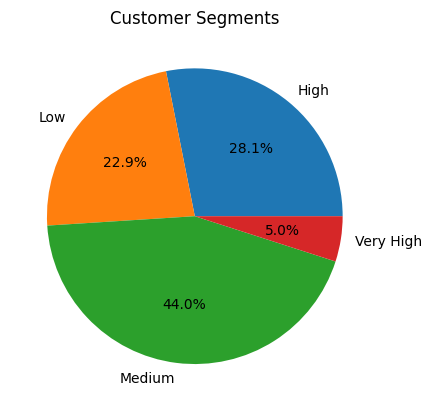

In [ ]:
#Customer Segmentation by Order Value
mycursor.execute("""
      WITH OrderValueCTE AS (
    SELECT CustKey, SUM(Quant * UnitPriceUSD) AS TotalOrderValue
    FROM test.DS
    GROUP BY CustKey
)
SELECT
    CASE
        WHEN TotalOrderValue <= 1000 THEN 'Low'
        WHEN TotalOrderValue > 1000 AND TotalOrderValue <= 5000 THEN 'Medium'
        WHEN TotalOrderValue > 5000 AND TotalOrderValue <= 15000 THEN 'High'
        ELSE 'Very High'
    END AS CustomerSegment,
    COUNT(*) AS SegmentCount
FROM OrderValueCTE
GROUP BY CustomerSegment
ORDER BY CustomerSegment;
""")
rows = mycursor.fetchall()
# Extract labels and counts for the pie chart
labels = [row[0] for row in rows]
counts = [row[1] for row in rows]
print(tabulate(rows, headers=["CustomerSegment", "SegmentCount"]))

#plot a pie chart
import matplotlib.pyplot as plt
plt.pie(counts, labels=labels, autopct='%1.1f%%') # Use counts for slice sizes
plt.title('Customer Segments')
plt.show()

FrequencySegment      SegmentCount
------------------  --------------
Frequent                       293
Infrequent                    7404
Occasional                    4187
Very Frequent                    3


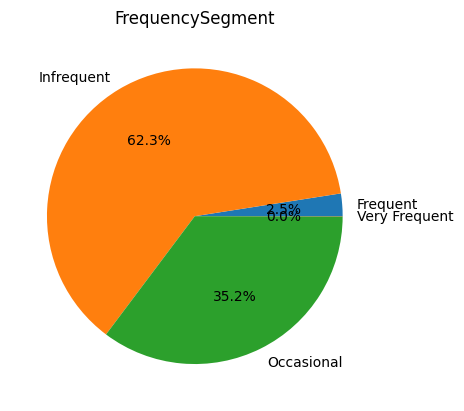

In [ ]:
#Customer Segmentation by Purchase Frequency
mycursor.execute("""WITH PurchaseFrequencyCTE AS (
    SELECT CustKey, COUNT(*) AS PurchaseFrequency
    FROM test.DS
    GROUP BY CustKey
)
SELECT
    CASE
        WHEN PurchaseFrequency <= 5 THEN 'Infrequent'
        WHEN PurchaseFrequency > 5 AND PurchaseFrequency <= 15 THEN 'Occasional'
        WHEN PurchaseFrequency > 15 AND PurchaseFrequency <= 30 THEN 'Frequent'
        ELSE 'Very Frequent'
    END AS FrequencySegment,
    COUNT(*) as SegmentCount -- Count the occurrences of each segment
FROM PurchaseFrequencyCTE
GROUP BY FrequencySegment
ORDER BY FrequencySegment;
""")
rows = mycursor.fetchall()
# Extract labels and counts for the pie chart
labels = [row[0] for row in rows]
counts = [row[1] for row in rows]  # Extract the counts
print(tabulate(rows, headers=["FrequencySegment", "SegmentCount"]))

#plot a pie chart
import matplotlib.pyplot as plt
plt.pie(counts, labels=labels, autopct='%1.1f%%') # Use counts for slice sizes
plt.title('FrequencySegment')
plt.show()

In [ ]:
mycursor.execute("""
    WITH OrderValueCTE AS (
    SELECT CustKey, SUM(Quant * UnitPriceUSD) AS TotalOrderValue
    FROM test.DS
    GROUP BY CustKey
)
SELECT
    CustKey,
    CASE
        WHEN TotalOrderValue <= 1000 THEN 'Low'
        WHEN TotalOrderValue > 1000 AND TotalOrderValue <= 5000 THEN 'Medium'
        WHEN TotalOrderValue > 5000 AND TotalOrderValue <= 15000 THEN 'High'
        ELSE 'Very High'
    END AS CustomerSegment
FROM OrderValueCTE;
""")
rows = mycursor.fetchall()

#store it as a table
import pandas as pd
order_value_df = pd.DataFrame(rows, columns=["CustKey", "CustomerSegment"])
order_value_df.to_csv("/content/drive/MyDrive/DataSpark/order_value_df.csv", index=False)



In [ ]:
mycursor.execute("""
    WITH PurchaseFrequencyCTE AS (
    SELECT CustKey, COUNT(*) AS PurchaseFrequency
    FROM test.DS
    GROUP BY CustKey
)
SELECT
    CustKey,
    CASE
        WHEN PurchaseFrequency <= 5 THEN 'Infrequent'
        WHEN PurchaseFrequency > 5 AND PurchaseFrequency <= 15 THEN 'Occasional'
        WHEN PurchaseFrequency > 15 AND PurchaseFrequency <= 30 THEN 'Frequent'
        ELSE 'Very Frequent'
    END AS FrequencySegment
FROM PurchaseFrequencyCTE;
""")
# Call fetchall to get the results from the query
rows = mycursor.fetchall()

#store it as a table
import pandas as pd
purchase_frequency_df = pd.DataFrame(rows, columns=["CustKey", "FrequencySegment"])
purchase_frequency_df.to_csv("/content/drive/MyDrive/DataSpark/purchase_frequency_df.csv", index=False)

In [ ]:
mycursor.execute("USE test;")
mycursor.execute("""
    SELECT
    Customer_Purchase_Details.*,   -- Select all columns from the first table
    CSOL.*    -- Select all columns from the second table
FROM
    Customer_Purchase_Details
    LEFT JOIN CSOL ON Customer_Purchase_Details.CustKey = CSOL.CustKey;
""")



In [ ]:
mycursor.execute("USE test;")
mycursor.execute("""
    SELECT
    Customer_Purchase_Details.*,   -- Select all columns from the first table
    CSPF.*    -- Select all columns from the second table
FROM
    Customer_Purchase_Details
    LEFT JOIN CSPF ON Customer_Purchase_Details.CustKey = CSPF.CustKey;
""")
connection.commit()
#verify the join
mycursor.execute("SELECT * FROM Customer_Purchase_Details LIMIT 5;")
rows = mycursor.fetchall()
print(tabulate(rows, headers=[desc[0] for desc in mycursor.description]))

  CustKey  CustName           AvgOrderValue  City            State               Country    Continent      OrderFreq  Preferred_Prods    ProductCount
---------  ---------------  ---------------  --------------  ------------------  ---------  -----------  -----------  -----------------  --------------
      301  Lilly Harding                592  Wandearah East  South Australia     Australia  Australia              1
      325  Madison Hull                 578  Mount Budd      Western Australia   Australia  Australia             10
      554  Claire Ferres                237  Winjallok       Victoria            Australia  Australia              4
     1042  Aidan Pankhurst              374  Tawonga South   Victoria            Australia  Australia              3
     1314  Isaac Israel                 507  Edith River     Northern Territory  Australia  Australia


#3.Product Analysis

In [ ]:
#Popularity of Products
#Most Popular Products
mycursor.execute("""
SELECT
    p.ProdName,
    SUM(s.Quant) AS TotalQuantitySold,
    SUM(s.Quant * s.UnitPriceUSD) AS TotalSales
FROM
    DS AS s
JOIN
    dim_product AS p ON s.ProdKey = p.ProdKey
GROUP BY
    p.ProdName
ORDER BY
    TotalQuantitySold DESC
LIMIT 10;
""")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["ProdName", "TotalQuantitySold", "TotalSales"]))

#Least Popular Products
mycursor.execute("""
SELECT
    p.ProdName,
    SUM(s.Quant) AS TotalQuantitySold,
    SUM(s.Quant * s.UnitPriceUSD) AS TotalSales
FROM
    DS s
JOIN
    dim_product AS p ON s.ProdKey = p.ProdKey
GROUP BY
    p.ProdName
ORDER BY
    TotalQuantitySold ASC
LIMIT 10;
""")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["ProdName", "TotalQuantitySold", "TotalSales"]))


In [ ]:
#Profitability of Products
mycursor.execute("""
SELECT
    p.ProdName,
    SUM(s.Quant * s.UnitPriceUSD) AS TotalRevenue,
    SUM(s.Quant * p.UnitCost) AS TotalCost,
    (SUM(s.Quant * s.UnitPriceUSD) - SUM(s.Quant * p.UnitCost)) AS TotalProfit,
    ((SUM(s.Quant * s.UnitPriceUSD) - SUM(s.Quant * p.UnitCost)) / SUM(s.Quant * s.UnitPriceUSD)) * 100 AS ProfitMarginPercentage
FROM
    DS s
JOIN
    dim_product AS p ON s.ProdKey = p.ProdKey
GROUP BY
    p.ProdName
ORDER BY
    TotalProfit DESC;
""")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["ProdName", "TotalRevenue", "TotalCost", "TotalProfit", "ProfitMarginPercentage"]))


In [ ]:
#Sales performance by Product Category
mycursor.execute("""
SELECT
    p.ProdCategory AS Category,
    p.ProdSubCategory AS SubCategory,
    SUM(s.Quant * s.UnitPriceUSD) AS TotalSales,
    COUNT(DISTINCT s.OrderKey) AS TotalOrders,
    AVG(s.Quant * s.UnitPriceUSD) AS AverageOrderValue
FROM
    DS s
JOIN
    dim_product AS p ON s.ProdKey = p.ProdKey
GROUP BY
    p.ProdCategory, p.ProdSubCategory
ORDER BY
    TotalSales DESC;
""")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["Category", "SubCategory", "TotalSales", "TotalOrders", "AverageOrderValue"]))

#4.Store Analysis

In [ ]:
#Sales Performance by store
mycursor.execute("""
SELECT
    s.storekey,
    COUNT(DISTINCT s.orderno) AS Total_Orders,
    SUM(s.quant * s.exchangerate) AS Total_Sales_in_USD,
    AVG(s.quant * s.exchangerate) AS Avg_Sale_per_Order_in_USD
FROM
    DS s
GROUP BY
    s.storekey
ORDER BY
    Total_Sales_in_USD DESC;
""")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["StoreKey", "Total_Orders", "Total_Sales_in_USD", "Avg_Sale_per_Order_in_USD"]))

In [ ]:
#Sales by Store Country
mycursor.execute("""
SELECT st_country, SUM(quant * unitpriceusd) AS TotalSales
FROM DS
GROUP BY st_country
ORDER BY TotalSales DESC;
""")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["Country", "TotalSales"]))

In [ ]:
#Top Stores by Revenue
mycursor.execute("""
SELECT storekey, SUM(quant * unitpriceusd) AS Revenue
FROM DS
GROUP BY storekey
ORDER BY Revenue DESC
LIMIT 10;
""")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["StoreKey", "Revenue"]))

In [ ]:
#Montly Sales Trend
mycursor.execute("""
SELECT storekey, MONTH(odate) AS Month, SUM(quant * unitpriceusd) AS MonthlySales
FROM DS
GROUP BY storekey, MONTH(odate)
ORDER BY storekey, Month;
""")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["StoreKey", "Month", "MonthlySales"]))

In [ ]:
#Yearly Sales Trend
mycursor.execute("""
SELECT storekey, state AS StoreState, country AS StoreRegion, continent AS StoreContinent,
       YEAR(odate) AS Year,
       SUM(quant * unitpriceusd) AS YearlySales
FROM DS
GROUP BY storekey, state, country, continent, YEAR(odate)
ORDER BY storekey, StoreState, StoreRegion, StoreContinent, Year;
""")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["StoreKey", "StoreState", "StoreRegion", "StoreContinent", "Year", "YearlySales"]))

#5.Exchange Rate Analysis

In [ ]:
#Correlation between Exchange Rate and Sales
mycursor.execute("""
SELECT
    s.odate AS Order_Date,
    s.curcode AS Currency,
    AVG(e.ExchangeRate) AS Avg_ExchangeRate,
    SUM(s.quant * e.ExchangeRate) AS Total_Sales_in_USD
FROM
    DS s
JOIN
    dim_exchange_rate e
ON
    s.odate = e.Date
AND
    s.curcode = e.CurCode
GROUP BY
    s.odate, s.curcode
ORDER BY
    s.odate, s.curcode;
""")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["Order_Date", "Currency", "Avg_ExchangeRate", "Total_Sales_in_USD"]))


In [ ]:
#Sales Perfomace in Different Currencies
mycursor.execute("""
SELECT
    s.curcode AS Currency,
    COUNT(DISTINCT s.orderno) AS Total_Orders,
    COUNT(s.lineitem) AS Total_LineItems,
    SUM(s.quant * e.ExchangeRate) AS Total_Sales_in_USD,
    AVG(s.quant * e.ExchangeRate) AS Avg_Sales_in_USD
FROM
    DS s
JOIN
    dim_exchange_rate e
ON
    s.odate = e.Date
AND
    s.curcode = e.CurCode
GROUP BY
    s.curcode
ORDER BY
    Total_Sales_in_USD DESC;
""")

rows = mycursor.fetchall()
print(tabulate(rows, headers=["Currency", "Total_Orders", "Total_LineItems", "Total_Sales_in_USD", "Avg_Sales_in_USD"]))

In [ ]:
#Impact of Currency fluctuation on Sales
mycursor.execute("""
SELECT
    s.curcode AS Currency,
    SUM(s.quant * e.ExchangeRate) AS Sales_in_USD,
    COUNT(DISTINCT s.orderno) AS Total_Orders,
    COUNT(s.lineitem) AS Total_LineItems,
    AVG(s.quant * e.ExchangeRate) AS Avg_Sale_in_USD
FROM
    sales_data s
JOIN
    exchange_rate_data e
ON
    s.odate = e.Date
AND
    s.curcode = e.CurCode
GROUP BY
    s.curcode
ORDER BY
    Sales_in_USD DESC;
""")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["Currency", "Sales_in_USD", "Total_Orders", "Total_LineItems", "Avg_Sale_in_USD"]))


#6.Operation Analysis

In [ ]:
#Store Footfall Conversion Rate
mycursor.execute("""
WITH Footfall AS (
    SELECT
        storekey,
        COUNT(DISTINCT custkey) AS Customer_Footfall
    FROM
        DS
    GROUP BY
        storekey
),
Sales_Conversion AS (
    SELECT
        storekey,
        COUNT(DISTINCT orderno) AS Total_Orders,
        COUNT(DISTINCT custkey) AS Converting_Customers
    FROM
        DS
    GROUP BY
        storekey
)
SELECT
    f.storekey,
    f.Customer_Footfall,
    sc.Total_Orders,
    sc.Converting_Customers,
    (sc.Converting_Customers * 1.0 / f.Customer_Footfall) * 100 AS Conversion_Rate_Percentage
FROM
    Footfall f
JOIN
    Sales_Conversion sc ON f.storekey = sc.storekey
ORDER BY
    Conversion_Rate_Percentage DESC;
""")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["StoreKey", "Customer_Footfall", "Total_Orders", "Converting_Customers", "Conversion_Rate_Percentage"]))

In [ ]:
#Operational Efficiency Analysis
mycursor.execute("""
SELECT
    s.storekey,
    SUM(s.quant * s.exchangerate) AS Total_Sales_in_USD,
    s.sqmeters,
    (SUM(s.quant * s.exchangerate) / s.sqmeters) AS Sales_per_SqMeter_in_USD,
    COUNT(DISTINCT s.orderno) AS Total_Orders,
    (COUNT(DISTINCT s.orderno) / s.sqmeters) AS Orders_per_SqMeter
FROM
    DS s
GROUP BY
    s.storekey, s.sqmeters
ORDER BY
    Sales_per_SqMeter_in_USD DESC;
""")
rows = mycursor.fetchall()
print(tabulate(rows, headers=["StoreKey", "Total_Sales_in_USD", "SqMeters", "Sales_per_SqMeter_in_USD", "Total_Orders", "Orders_per_SqMeter"]))